# Homework 2
#### Preparing the dataset
##### First, we'll normalize the names of the columns:

#####  - df.columns = df.columns.str.lower().str.replace(' ', '_')
##### Now, instead of 'Final Price', we have 'final_price'.

##### Next, use only the following columns:

#####  - 'ram',
#####  - 'storage',
#####  - 'screen',
#####  - 'final_price'
#### EDA
#####  - Look at the final_price variable. Does it have a long tail?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("laptops.csv")

In [3]:
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


#### Exploratory Data Analysis

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

## Question 1
#### There's one column with missing values. What is it?

In [5]:
features = ['ram', 'storage', 'screen', 'final_price']

In [6]:
df[features].isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

## Question 2
#### What's the median (50% percentile) for variable 'ram'?

In [7]:
df.ram.median()

16.0

#### Visualize the Dataset

<Axes: xlabel='final_price', ylabel='Count'>

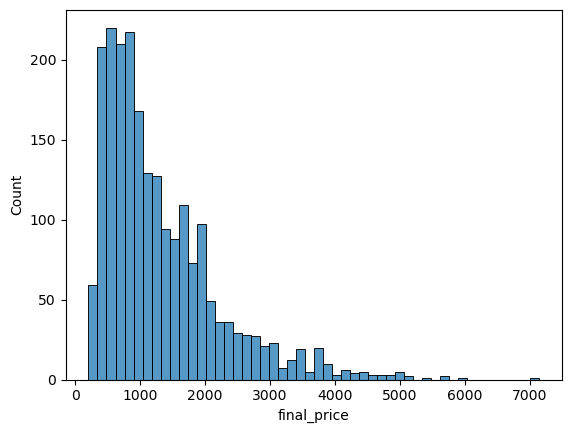

In [8]:
sns.histplot(df.final_price, bins=50)

#### Normal Distribution

<Axes: xlabel='final_price', ylabel='Count'>

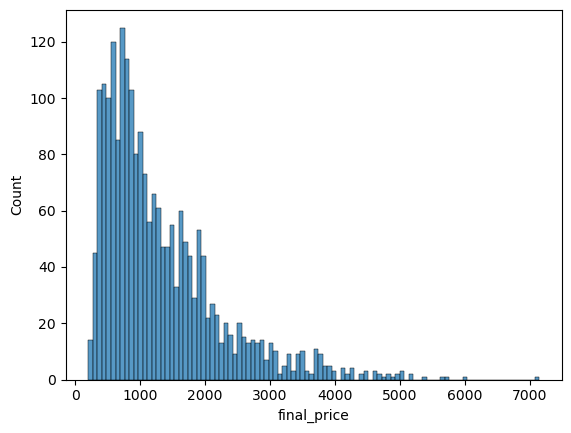

In [42]:
final_price = df.final_price
sns.histplot(final_price, bins=100)

#### Split the Dataframe
##### Train, Validate, Test (60%, 20%, 20%)

In [10]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_train, n_val, n_test

(1296, 432, 432)

#### Create the New Dataframes

##### Initialize the array

In [11]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [12]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

##### Splitting the Dataframe to Train, Validation, Test

In [13]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [14]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

##### Reset the Indices of the New Dataframes

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

#### Get the Target Variables (final_price)

In [16]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values
y_train

array([1123.29,  201.05,  997.74, ..., 1059.  , 1671.  , 1056.  ])

In [17]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

#### Linear Regression

In [18]:
def linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [19]:
base = ['ram', 'storage', 'screen']
df_train[base] # X

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0
...,...,...,...
1291,8,256,14.0
1292,32,1000,16.0
1293,16,512,15.6
1294,16,512,14.0


##### Extract Features

In [20]:
X_train = df_train[base].values

###### We'll try to fill the null values with 0 

In [21]:
df_train[base].isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [22]:
X_train = df_train[base].fillna(0).values

In [23]:
w0, w = linear_regression(X_train, y_train)
w0, w

(676.8954853003471, array([ 43.70681555,   0.86506867, -36.10399833]))

In [24]:
y_pred = w0 + X_train.dot(w)

In [25]:
y_pred

array([2377.35987681,  398.02076576, 2435.12627415, ..., 1255.89731808,
       1313.66371541, 1313.66371541])

## Question 3
#### Which option gives better RMSE?
#### Fill null values with 0 or with the mean of this variable?

#### Root Mean Squared Error
###### Check the model's performance

In [26]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [27]:
np.round(rmse(y_train, y_pred), 2)

602.39

#### Now comparing it when using mean to fill the null values instead of zeros

In [28]:
mean = df_train.screen.mean()

In [29]:
X_train = df_train[base].fillna(mean).values

In [30]:
w0, w = linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
np.round(rmse(y_train, y_pred),2)

602.18

In [41]:
# 602.18 (mean) is better than 602.39 (zero)

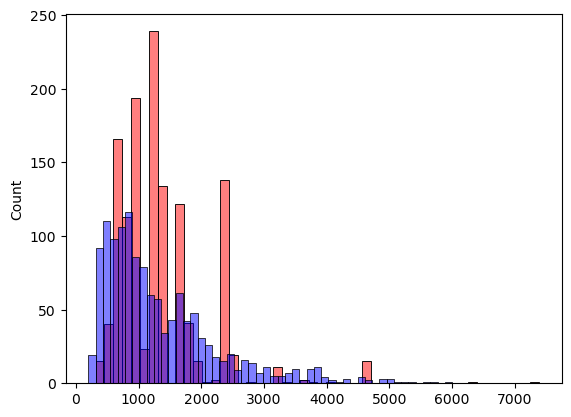

In [32]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
plt.show()

#### Computing RMSE on Validation Dataset

In [33]:
base = ['ram', 'storage', 'screen']
X_train = df_train[base].values
w0, w = linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
mean = df_train.screen.mean()

In [34]:
def prepare_X(df, fill=0):
    df_num = df[base]
    df_num = df_num.fillna(fill)
    X = df_num.values
    return X

In [35]:
X_train = prepare_X(df_train)
w0, w = linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

597.36

In [36]:
X_train = prepare_X(df_train, mean)
w0, w = linear_regression(X_train, y_train)

X_val = prepare_X(df_val, mean)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

600.27

## Question 4
#### Now let's train a regularized linear regression.
#### For this question, fill the NAs with 0.
#### Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
#### Use RMSE to evaluate the model on the validation dataset.
#### Round the RMSE scores to 2 decimal digits.
#### Which r gives the best RMSE?

#### Linear Regression with Regularization

In [37]:
def linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]) 

    XT = X.T
    XTX = XT.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0]) # regularization
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [38]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train, 0)
    w0, w = linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    print(r, score)

0 597.3635593619621
0.01 597.3616819856014
0.1 597.3451592963619
1 597.2121215589522
5 597.0111186297036
10 597.0587680661118
100 597.9032640603045


## Question 5
#### We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
#### Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
#### For each seed, do the train/validation/test split with 60%/20%/20% distribution.
#### Fill the missing values with 0 and train a model without regularization.
#### For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
#### What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
#### Round the result to 3 decimal digits (round(std, 3))

In [39]:
scores = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    X_train = prepare_X(df_train, 0)
    w0, w = linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    
    scores.append(rmse(y_pred, y_val))
    
np.round(np.std(scores), 3)

29.176

## Question 6
#### Split the dataset like previously, use seed 9.
#### Combine train and validation datasets.
#### Fill the missing values with 0 and train a model with r=0.001.
#### What's the RMSE on the test dataset?

In [40]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

df_full = pd.concat([df_train, df_val])
df_full = df_full.reset_index(drop=True)

X_train_full = prepare_X(df_full, 0)
y_full = np.concatenate([y_train, y_val])
w0, w = linear_regression_reg(X_train_full, y_full, r=0.001)

X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)

rmse(y_pred, y_test)

608.6099822049559